# Time Series

# Introduction to Time series

* A time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. 

* A time series is a sequence of numerical data points in successive order.

* A time series tracks the movement of the chosen data points, over a specified period of time with data points recorded at regular intervals. 

* There is no minimum or maximum amount of time that must be included

eg - Economic Forecasting , Sales Forecasting , Budgetary Analysis , Stock Market Analysis , Yield Projections , Census Analysis

# Time Series Forecasting

* Time series forecasting is the use of a model to predict future values based on previously observed values. Most often, this relates to trend analysis, cyclical fluctuation analysis and issues of seasonality.



# Components of Time Series
* Trend

* Seasonality

* Irregularity

* Cyclic

## Trend
* A movement relatively higher or lower values over a long period of time,when the series analysis  show a pattern that is upward or downward we call it upterend and downterend respectively.

* If there is no Trend we call it horizontal trend or stationary trend

* Trend is something that happens for time and then disappears.

## Seasonality
Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year. Any predictable fluctuation or pattern that recurs or repeats over a one-year period is said to be seasonal.


Seasonal effects are different from cyclical effects, as seasonal cycles are observed within one calendar year, while cyclical effects, such as boosted sales due to low unemployment rates, can span time periods shorter or longer than one calendar year.

## Irregularity
* It is also called noise or residual

* These are unpredictabe in nature or unsystematic , they happen for short duration and are non repeating.

eg- buying of medicine due to flood goes up , but when flood goes ,the sales of medicines come down , in this we don't know how much sale is going to happen.

## Cyclic
cycles are observed within one calendar year, while cyclical effects, such as boosted sales due to low unemployment rates, can span time periods shorter or longer than one calendar year.


### Time series can not be used 
* when the values are constant. ef - sale of coffee is same every day for every month.

* values are in form of functions - sin(x) or cos(x) , we can just get the values by putting them in function.

## Stationarity 
For applying any kind of model on time series data . The data should be stationary.

For data to be stationary -

* It should have a constant mean according to time.

* It should have constan variance i.e variance should be equal at equal intervals of time.


**Time Series analysis have 4 phases:**

* Load data

* check stationarity

* Make series stationary

* Buid model

## in Anaconda Prompt ------   pip install import_ipynb


- This will allow to import other ipynb file

In [3]:
!pip install import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2979 sha256=2622ffb0a66cc7a0a38e00afd43fcf54667ce669d30e8a7e6553d7ad85ef9dd5
  Stored in directory: c:\users\raima\appdata\local\pip\cache\wheels\06\7e\ad\1cb03e935234186825cefc7e2c8f3451b4f654b5bc72232a7b
Successfully built import-ipynb


In [14]:
import import_ipynb
import Module_making


In [7]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs    
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [9]:
df = pd.read_csv(r'D:\AirPassengers.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TravelDate  144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


,TravelDate,Passengers
0,01-01-1949,112
1,02-01-1949,118
2,03-01-1949,132
3,04-01-1949,129
4,05-01-1949,121


In [10]:
df['TravelDate'] = pd.to_datetime(df['TravelDate'])

print(df.info())

indexed_df = df.set_index('TravelDate')
indexed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TravelDate  144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### To check stationarity we have 2 popular tests - 
* **Rolling statistics** - Here we plot the moving average or moving variance and see if it varies with time.


* **Augumented Dikley Fuler Test (ADF Test)** - IT HAS A NULL HYPOTHESIS - That the time series is not stationary  , the result comparises of Test statistic and some critical values for different confidence level.

p value should be less than 0.5

if test statistic < critical value , we can reject the null hypothesis and say that the series is stationary.

**Using Another IPYNB file as a Module here and using Function TS defined in that module to check stationarity**

In [11]:
# from statsmodels.tsa.stattools import adfuller
# dftest = adfuller(indexed_df)
#     
# print(dftest)
# print('\n SERIES OUTPUT')
# dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic' , 'p-value' , 'lags-used', 'no. of observations used'])
# print(dfoutput)
# print('\n DICTIONARY OUTPUT')
# for key,value in dftest[4].items():
#         print('\n critical value',key,'=',value)


Test Statistic                0.815369
p-value                       0.991880
lags-used                    13.000000
no. of observations used    130.000000
dtype: float64

 critical value 1% = -3.4816817173418295

 critical value 5% = -2.8840418343195267

 critical value 10% = -2.578770059171598


'p > 0.05 - Accept the Null Hypothesis '

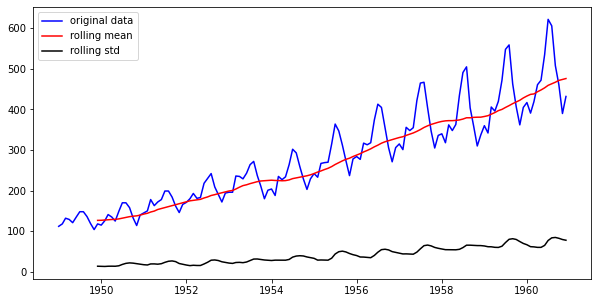

In [15]:
Module_making.ts(indexed_df)

''' P Value < 0.05 '''
# so we Reject the Null Hypothesis, thus Time Series is Stationary
'''p > 0.05 - Accept the Null Hypothesis '''

## Making Time Series Stationary
There are 2 major reasons behind non-stationaruty of a TS:

1. __Trend__ – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. __Seasonality__ – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

### Transformations
- These can be taking a LOG or DIFFERENCE the data

## Taking LOG of these values

In [16]:
indexed_df.head()

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


            Passengers
TravelDate            
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791


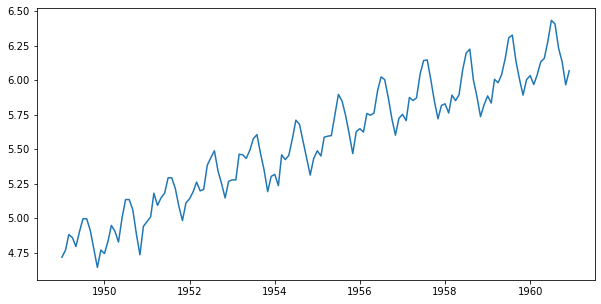

In [17]:
# estimate trend , we take lOG of the original data , it changes the values on y
fig = plt.figure(figsize=(10,5))

indexed_df_log = np.log(indexed_df)

plt.plot(indexed_df_log);

print(indexed_df_log.head())


## Checking Stationarity

Test Statistic               -1.717017
p-value                       0.422367
lags-used                    13.000000
no. of observations used    130.000000
dtype: float64

 critical value 1% = -3.4816817173418295

 critical value 5% = -2.8840418343195267

 critical value 10% = -2.578770059171598


'if p < 0.05 - stationarity achieved'

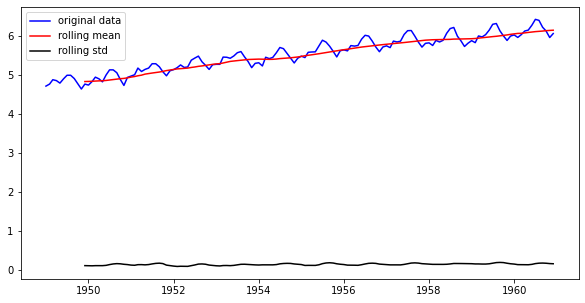

In [18]:
Module_making.ts(indexed_df_log) 

'''if p < 0.05 - stationarity achieved'''

## Differencing - 2nd method to remove stationarity

#### .shift() = Shifts index by desired number of periods with an optional time freq.

By it we can see the percentage change or change in number of passengers in a month.

The following command shifts the passengers forward by 1 month.
- Differencing is performed by subtracting the previous observation from the current observation.

In [19]:
indexed_df.head()

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [20]:
indexed_df.shift(periods = 2).head()

,Passengers
TravelDate,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,112.0
1949-04-01,118.0
1949-05-01,132.0


In [21]:
print(indexed_df_log.head())

indexed_df_log.shift(periods = 2).head()

            Passengers
TravelDate            
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791


,Passengers
TravelDate,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,4.718499
1949-04-01,4.770685
1949-05-01,4.882802


In [22]:
# indexed_df_shiffting = indexed_df - indexed_df.shift(periods = 1);
# 
indexed_df_shiffting = indexed_df - indexed_df.shift(periods = 2)

print(indexed_df_shiffting.head())
indexed_df_shiffting.dropna(inplace = True)


            Passengers
TravelDate            
1949-01-01         NaN
1949-02-01         NaN
1949-03-01        20.0
1949-04-01        11.0
1949-05-01       -11.0


Test Statistic               -2.961695
p-value                       0.038630
lags-used                    11.000000
no. of observations used    130.000000
dtype: float64

 critical value 1% = -3.4816817173418295

 critical value 5% = -2.8840418343195267

 critical value 10% = -2.578770059171598


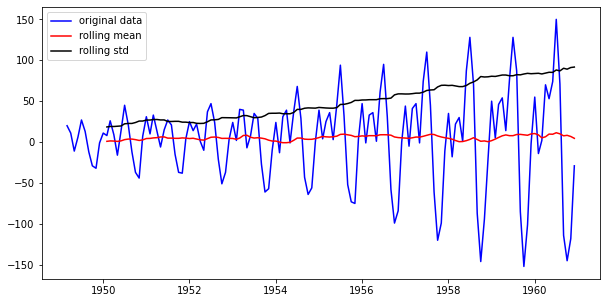

In [23]:
# Checking Stationarity
Module_making.ts(indexed_df_shiffting)

## ACF & PACF Graphs

- ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.
- A lag 1 autocorrelation (i.e., k = 1 in the above) is the correlation between values that are one time period apart. More generally, a lag k autocorrelation is the correlation between values that are k time periods apart.
- The ACF is a way to measure the linear relationship between an observation at time t and the observations at previous times
- ACF Graph is used to check the Value to be taken for MA model
- The PACF is most useful for identifying the order of an autoregressive model. 
- PACF graph is used to check the Value to be taken for AR model

In [24]:
# PACF - AR - AR Model - only value for p
# ACF -  MA - MA Model - only value for q

# ARIMA - p,d,q

## ARIMA
* ARIMA models (which include ARMA, AR and MA models) are a general class of models to forecast stationary time series. ARIMA models are made of three parts:


    - A weighted sum of lagged values of the series (Auto-regressive (AR) part) - p
    - A weighted sum of lagged forecasted errors of the series (Moving-average (MA) part) -q
    - A difference of the time series (Integrated (I) part)-i
    
    
* An ARIMA model is often noted ARIMA(p, d, q) where p represents the order of the AR part, d the order of differencing (“I” part), and q the order of the MA term.

## Feeding Data without taking log and Differencing thus without making it Stationary

In [25]:
len(indexed_df)
# indexed_df.head()

144

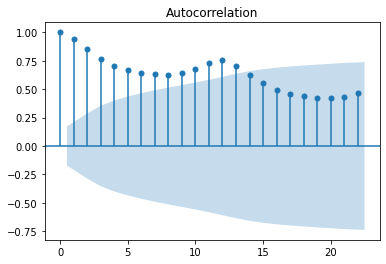

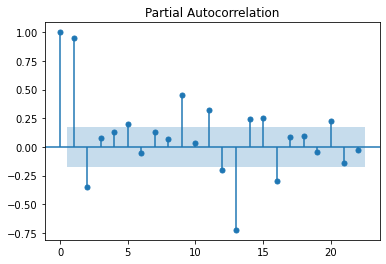

In [26]:
x2 = indexed_df[:130]
y2 = indexed_df[130:]

Module_making.acf_pacf_plots(x2)

# PACF - AR - AR Model - only value for p
# ACF -  MA - MA Model - only value for q


In [27]:
y2.index[0]

Timestamp('1959-11-01 00:00:00')

In [28]:
y2.index[-1]

Timestamp('1960-12-01 00:00:00')

<Figure size 720x360 with 0 Axes>

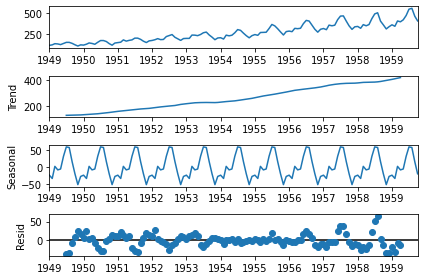

In [29]:
# Seasonal Decompse
from statsmodels.tsa.seasonal import seasonal_decompose
fig = plt.figure(figsize=(10,5))
decomposition = seasonal_decompose(x2)
decomposition.plot()

# To Check for Individual Values
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [30]:
# Auto ARIMA

import pmdarima as pm

stepwise_model = pm.auto_arima(x2, start_p=1, start_q=1,
                           max_p=15, max_q=15, m=12)
print(stepwise_model)


stepwise_model.predict(n_periods=12)

ModuleNotFoundError: No module named 'pmdarima'

In [31]:
# fitting train data
from statsmodels.tsa.arima_model import ARIMA

# AR model
model  = ARIMA(x2, order = (10,1,0))  # (p , d(differenced) , q) values , we can use different values to make model good or worse

results_ar_2 = model.fit()

pred_2 = results_ar_2.predict(start = y2.index[0], end = y2.index[-1],typ = 'levels')


# 10,1,0 - 5.2

# using AR = 4 means ARIMA is taking in consideration past 4 days value for AR to predict next value

In [ ]:
df_pred_2 = pd.DataFrame({'Actual': y2.Passengers, 'Predicted':pred_2})

fig = plt.figure(figsize=(13,7))

plt.plot(df_pred_2.Actual,color = 'red', label = 'orignal')

plt.plot(df_pred_2.Predicted,color = 'black',label = 'predicted')

plt.plot(x2.Passengers, color = 'yellow', label = 'train')

plt.legend();

# To check results
Module_making.evaluate_forecast(y2.Passengers, pred_2)



In [33]:
df_pred_2

,Actual,Predicted
1959-11-01,362,342.991133
1959-12-01,405,370.994972
1960-01-01,417,374.339551
1960-02-01,391,385.839590
1960-03-01,419,428.001460
1960-04-01,461,409.309128
1960-05-01,472,452.463842
1960-06-01,535,498.848004
1960-07-01,622,581.893825
1960-08-01,606,576.568847


## Feeding Data only Using LOG transformation and not taking Differencing

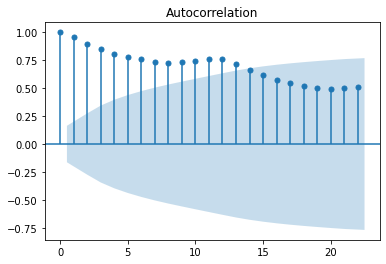

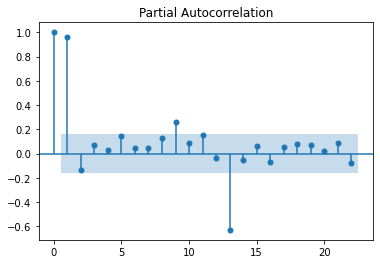

In [34]:
x1 = indexed_df_log[:130]
y1 = indexed_df_log[130:]

Module_making.acf_pacf_plots(indexed_df_log)

# PACF - AR - AR Model - only value for p
# ACF -  MA - MA Model - only value for q

In [ ]:
# fitting train data
from statsmodels.tsa.arima_model import ARIMA

# AR model
model  = ARIMA(x1, order = (12,2,1))  # (p , d(differenced) , q) values , we can use different values to make model good or worse

results_ar = model.fit()

pred = results_ar.predict(start = y1.index[0], end = y1.index[-1],typ = 'levels')


In [26]:
np.exp(pred)

1959-11-01    358.997543
1959-12-01    386.118155
1960-01-01    414.834988
1960-02-01    396.447915
1960-03-01    457.717630
1960-04-01    457.996993
1960-05-01    480.505676
1960-06-01    550.132525
1960-07-01    621.318596
1960-08-01    639.142051
1960-09-01    531.695164
1960-10-01    470.019150
1960-11-01    417.133788
1960-12-01    448.315718
Freq: MS, dtype: float64

In [ ]:
def evaluate_forecast(y,pred):
    
    results = pd.DataFrame({'Mean_Absolute_Error' : mean_absolute_error(y, pred)}, index=['Values'])
    
    results['Mean_Squared_Error'] = mean_squared_error(y, pred)
   
    results['Mean_Absolute_Percentage_Error'] = np.mean(np.abs((y - pred) / y)) * 100
    
    results['Root_Mean_Sqared_Error'] = np.sqrt(results['Mean_Squared_Error'])
    `
    return results

In [ ]:
df_pred = pd.DataFrame({'Actual': np.exp(y1.Passengers), 'Predicted':np.exp(pred)})

fig = plt.figure(figsize=(13,7))

plt.plot(df_pred.Actual,color = 'red', label = 'orignal')

plt.plot(df_pred.Predicted,color = 'black',label = 'predicted')

plt.plot(np.exp(x1.Passengers), color = 'yellow', label = 'train')

plt.legend();

# Checking Results
evaluate_forecast(np.exp(y1.Passengers),np.exp(pred))

# using AR = 4 means ARIMA is taking in consideration past 4 days value for AR to predict next value

 # Forecasted Value:  [358.99754309 386.11815502 414.83498819 396.44791541 457.71763019
 457.99699257 480.50567568 550.13252483 621.31859632 639.14205149
 531.69516409 470.01914994]

 # Standard Error:  [1.04059048 1.05448418 1.06772648 1.07810365 1.08713517 1.09641976
 1.10427717 1.11244811 1.11873745 1.12630407 1.13228649 1.13991402]

 Confidence Interval:  [[332.06537886 388.11404065]
 [347.98659566 428.4280817 ]
 [364.83355961 471.68924812]
 [342.11546323 459.4090783 ]
 [388.58246268 539.15307332]
 [382.3925597  548.5494942 ]
 [395.60977097 583.61982262]
 [446.43748315 677.91304785]
 [498.66499164 774.14056452]
 [506.23733601 806.93882677]
 [416.78324917 678.28960995]
 [363.62044737 607.55109596]]


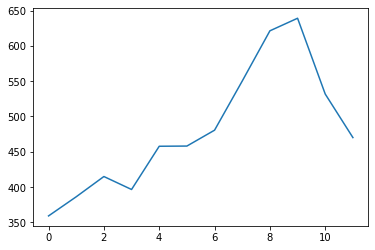

In [28]:
forecast = results_ar.forecast(steps = 12)

print(' # Forecasted Value: ', np.exp(forecast[0])) # Forecasted Value
print('\n # Standard Error: ',np.exp(forecast[1])) # Standard Error
print('\n Confidence Interval: ', np.exp(forecast[2])) # Confidence Interval

plt.plot(np.exp(forecast[0]))

In [29]:
# df_pred

In [30]:
import pickle

clf = KNN()
clf_rf= RF()
clf_rf.fit()
reg = Linear Regressor()


# saved the trained model in file with given name
pickle_out = open("random forest model.pickle","wb")
pickle.dump(clf_rf, pickle_out)
pickle_out.close()

In [31]:
# loading the pickeled model
pickle_in = open("random forest model.pickle","rb")
trained_model = pickle.load(pickle_in)

In [36]:
trained_model.forecast(5)[0]

array([5.88331554, 5.95614342, 6.02788082, 5.98254467, 6.12625247])